<a href="https://colab.research.google.com/github/frh02/CAN_Research/blob/main/LSTM_CAN_Multiclass_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries 

In [76]:
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import keras.utils
from keras import utils as np_utils
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from keras.utils.np_utils import to_categorical
import csv
%matplotlib inline  
from ast import literal_eval 
import array as array
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping


## Reading the file for multi class classification

In [77]:
df = pd.read_csv('/content/multi.csv')
print(df)

       Unnamed: 0  Unnamed: 0.1        Time       seconds  ...  D6  D7  D8 Target
0               0             0  Timestamp:  0.000000e+00  ...  1a  00  7f      0
1               1             1  Timestamp:  2.240000e-04  ...  2f  00  10      0
2               2             2  Timestamp:  4.620000e-04  ...  1a  20  43      0
3               3             3  Timestamp:  7.040000e-04  ...  00  00  53      0
4               4             4  Timestamp:  8.780000e-04  ...  -1  -1  -1      0
...           ...           ...         ...           ...  ...  ..  ..  ..    ...
35995        7995          7995  Timestamp:  1.481193e+09  ...  00  3b  10      3
35996        7996          7996  Timestamp:  1.481193e+09  ...  13  00  7f      3
35997        7997          7997  Timestamp:  1.481193e+09  ...  43  00  00      3
35998        7998          7998  Timestamp:  1.481193e+09  ...  13  1b  5a      3
35999        7999          7999  Timestamp:  1.481193e+09  ...  00  00  7a      3

[36000 rows x 1

## Shuffling the data and cleaning the data 


In [78]:
df = df.reindex(np.random.permutation(df.index))
properties = list(df.columns.values)
properties.remove('Time')
properties.remove('seconds')
properties.remove('ID')
properties.remove('DLC')
properties.remove('App')
properties.remove('Unnamed: 0')
properties.remove('Unnamed: 0.1')
properties.remove('Target')
df['Value']= df['Value'].apply(lambda x: int(str(x),16))
df['D1']=df['D1'].apply(lambda x: int(str(x),16))
df['D2']=df['D2'].apply(lambda x: int(str(x),16))
df['D3']=df['D3'].apply(lambda x: int(str(x),16))
df['D4']=df['D4'].apply(lambda x: int(str(x),16))
df['D5']=df['D5'].apply(lambda x: int(str(x),16))
df['D6']=df['D6'].apply(lambda x: int(str(x),16))
df['D7']=df['D7'].apply(lambda x: int(str(x),16))
df['D8']=df['D8'].apply(lambda x: int(str(x),16))
X = df[properties]
X = np.asarray(X).astype(np.float32)
y = df['Target']
X = np.expand_dims(X, axis=2)
y = np.expand_dims(y, axis=1)
print(X.shape)
print(y.shape)

(36000, 10, 1)
(36000, 1)


## One hot encoding for labels

In [79]:
y = to_categorical(y, num_classes=4)

## Converting the 2D array to the 3D array for LSTM analysis 

In [80]:
TIME_STEPS = 288
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    # Convert 2D sequences into 3D as we will be feeding this into
    # a convolutional layer.
    return np.expand_dims(output, axis=2)

training_value = df 
x_train = create_sequences(training_value)
print("Training input shape: ", x_train.shape)
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)

Training input shape:  (35712, 288, 1, 18)


In [81]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((27000, 10, 1), (27000, 4), (9000, 10, 1), (9000, 4))


## Loading the LSTM Model

In [82]:
epochs = 50
#emb_dim = 128
batch_size = 128
y[:2]
n_steps = X_train.shape[1]
n_features = X_train.shape[2]

In [83]:
model = Sequential()

model.add(LSTM(256, activation='relu',
               input_shape=(n_steps, n_features), return_sequences=True))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/50
169/169 [==============================] - 8s 37ms/step - loss: 1.3184 - accuracy: 0.5955 - val_loss: 0.5028 - val_accuracy: 0.7869
Epoch 2/50
169/169 [==============================] - 6s 35ms/step - loss: 0.5099 - accuracy: 0.7832 - val_loss: 0.4447 - val_accuracy: 0.8081
Epoch 3/50
169/169 [==============================] - 6s 35ms/step - loss: 0.4232 - accuracy: 0.8095 - val_loss: 0.3988 - val_accuracy: 0.8215
Epoch 4/50
169/169 [==============================] - 6s 35ms/step - loss: 0.3671 - accuracy: 0.8311 - val_loss: 0.4046 - val_accuracy: 0.8280
Epoch 5/50
169/169 [==============================] - 6s 36ms/step - loss: 0.3600 - accuracy: 0.8371 - val_loss: 0.3774 - val_accuracy: 0.8357
Epoch 6/50
169/169 [==============================] - 6s 35ms/step - loss: 0.3371 - accuracy: 0.8436 - val_loss: 0.3166 - val_accuracy: 0.8491
Epoch 7/50
169/169 [==============================] - 6s 34ms/step - loss: 0.3128 - accuracy: 0.8542 - val_loss: 0.3411 - val_accuracy: 0.8467

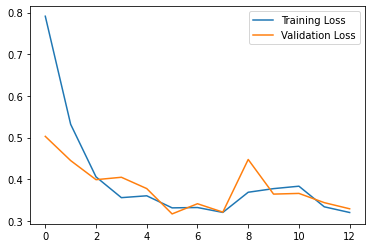

In [84]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

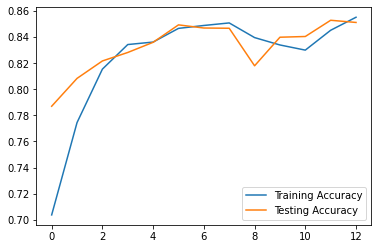

In [85]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()

## Using a simple deep learning model for classification data 

In [86]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
	  keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax),
])

In [87]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/100
169/169 [==============================] - 1s 4ms/step - loss: 6.2830 - accuracy: 0.4976 - val_loss: 0.9268 - val_accuracy: 0.5704
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 0.7631 - accuracy: 0.7025 - val_loss: 1.2910 - val_accuracy: 0.5959
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 0.7834 - accuracy: 0.7141 - val_loss: 0.5436 - val_accuracy: 0.7622
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 0.5416 - accuracy: 0.7779 - val_loss: 0.4827 - val_accuracy: 0.8007
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.7959 - val_loss: 0.4890 - val_accuracy: 0.7806
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss: 0.4624 - accuracy: 0.7975 - val_loss: 0.4921 - val_accuracy: 0.8019
Epoch 7/100
169/169 [==============================] - 1s 3ms/step - loss: 0.4748 - accuracy: 0.8013 - val_loss: 0.4340 - val_accuracy: 0.8167

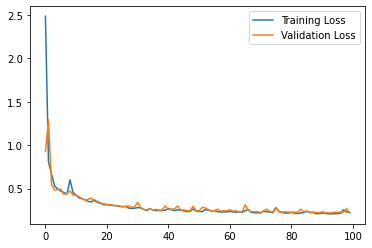

In [88]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

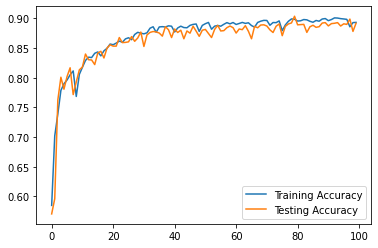

In [89]:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Testing Accuracy")
plt.legend()
plt.show()